# Instacart
# Michael Boles
# Data challenge: shopper hiring problem

<a id='1'></a>
## Prompt and Executive Summary

### Prompt
A/B testing shopper hiring funnel - will moving background check earlier in hiring sequence improve conversion rate? Conversion = shopper completing first batch. 

Background check costs \\$30. Shopper must complete this and activate prepaid debit card before they can go on to complete first batch. 

1.	What can be concluded from A/B test? With what confidence can conclusions be made?
2.	Is this change cost effective? How can we think about ROI? What if background check were \\$50 or \\$100?

### Response (executive summary)

#### A/B test conclusions
  - Success metric: fraction of prospective shoppers who complete their first batch of grocery deliveries
  - Measured success rates
   - Control: **19.8%**
     - About 1 in 5 prospective shoppers converts 
     - Control group has *self-paced background check initiation* upon beginning shopper application
   - Treatment: **34.3%** 
     - About 1 in 3 prospective shoppers converts
     - Treatment group is *required to immediately initiate background check* step upon applying
  - Difference in success rates 
   - **14.5 percentage point increase** in shopper conversions with immediate background check initiation 
   - 95% confidence interval spans **12.1 to 16.9 percentage point increase**
  - Conclusion
   - Reject null hypothesis - required immediate initiation of background check *does* meaningfully increase shopper conversion 
   - Recommendation: **launch** this feature
 
#### Cost effectiveness of change
- Basic logic
    - Must compare: 
        - **Gain**: value of increased shopper conversion rate
          - More shoppers leads to increased delivery capacity
          - *Fewer delivery windows must be turned off* during demand spikes
          - Increased revenue during demand spikes
          - May be expressed in terms of average lifetime value (LTV) of shopper to Instacart
          - Probably diminishing returns (LTV -> 0) as each additional shopper lessens the (diminishing) supply-demand gap
        - **Loss**: waste from potential increase in non-converting background checks
          - Background checks done on prospective shoppers who do not complete first batch delivery
          - A loss would correspond to increase in number of non-converting background checks from new policy

<br>
- Mathematical expressions 

\begin{equation*}
{\mathrm{Gain}} = \Delta n_{\mathrm{shopper}} \cdot LTV_{\mathrm{shopper}} 
\end{equation*} 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
where $\Delta n_{\mathrm{shopper}}$ = change in number of shoppers <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
and $LTV_{\mathrm{shopper}}$ = average lifetime value of a shopper, reflecting increased order capture during demand spikes 

<br><br>

\begin{equation*}
{\mathrm{Loss}} = \Delta n_{\mathrm{bckd\ check\ waste}} \cdot P_{\mathrm{bckd\ check}}
\end{equation*}    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
where $\Delta n_{\mathrm{bckd\ check\ waste}}$ = change in number of non-converting background checks <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
and $P_{\mathrm{bckd\ check}}$ = cost per background check

<br>

\begin{equation*}
{\mathrm{ROI}} = \frac{{\mathrm{Gain}} - {\mathrm{Loss}}}{{\mathrm{Loss}}}  
\end{equation*}

<br>

<!-- - Mathematical expressions    
    - *Value gain* from increased shopper conversion: number of shoppers gained * lifetime value of a shopper to Instacart (unknown, probably related to ability to fulfill orders in periods of high demand)
    - *Loss* from background check waste: money spent on background checks for shoppers who don't complete a batch
    - If gain from increased shopper conversion > loss from increased background check waste, recommend launching this change
    - *Return on investment* = Incremental profit from Instacart having additional shoppers to meet demand surges / Added cost from increased background checks  -->

- Conclusions
 - Recommend implementing change if ROI is positive (more specifically, if ROI for this project is higher than that of other available projects within company)
   - Cannot calculate ROI directly since shopper lifetime value (LTV) is unknown
   - Can, however, look into change in background check waste associated with change in background check initiation requirement
 - Fraction of prospective shoppers initiating background check step who ultimately drop out before completing first batch delivery:
     - Control group: **73.5%** (26.5% conversion) 
     - Treatment group: **65.7%** (34.3% conversion)
 - Initiating the background check immediately actually *reduces* background check losses by **7.8 percentage points**!
 - If cost of background check were higher (e.g., \\$50 or \\$100) the cost savings associated with introducing a requirement for immediate initiation of background check step would be even greater

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prompt-and-Executive-Summary" data-toc-modified-id="Prompt-and-Executive-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prompt and Executive Summary</a></span><ul class="toc-item"><li><span><a href="#Prompt" data-toc-modified-id="Prompt-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prompt</a></span></li><li><span><a href="#Response-(executive-summary)" data-toc-modified-id="Response-(executive-summary)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Response (executive summary)</a></span><ul class="toc-item"><li><span><a href="#A/B-test-conclusions" data-toc-modified-id="A/B-test-conclusions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>A/B test conclusions</a></span></li><li><span><a href="#Cost-effectiveness-of-change" data-toc-modified-id="Cost-effectiveness-of-change-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cost effectiveness of change</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-packages-and-data-set" data-toc-modified-id="Loading-packages-and-data-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading packages and data set</a></span></li><li><span><a href="#Checking-size-of-data-set-and-data-types" data-toc-modified-id="Checking-size-of-data-set-and-data-types-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking size of data set and data types</a></span></li><li><span><a href="#Looking-at-most-common-values,-frequency-of-missing-values" data-toc-modified-id="Looking-at-most-common-values,-frequency-of-missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Looking at most common values, frequency of missing values</a></span></li><li><span><a href="#Checking-applicant-data-for-duplicate-entries" data-toc-modified-id="Checking-applicant-data-for-duplicate-entries-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Checking applicant data for duplicate entries</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Feature-bar-graphs" data-toc-modified-id="Feature-bar-graphs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature bar graphs</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Compile-application,-background,-and-conversion-dates-for-each-prospective-shopper" data-toc-modified-id="Compile-application,-background,-and-conversion-dates-for-each-prospective-shopper-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Compile application, background, and conversion dates for each prospective shopper</a></span></li><li><span><a href="#Engineer-features:-time-interval-between-critical-steps-in-shopper-onboarding" data-toc-modified-id="Engineer-features:-time-interval-between-critical-steps-in-shopper-onboarding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Engineer features: time interval between critical steps in shopper onboarding</a></span></li><li><span><a href="#Plot-relevant-time-intervals-for-control,-test-groups" data-toc-modified-id="Plot-relevant-time-intervals-for-control,-test-groups-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot relevant time intervals for control, test groups</a></span></li></ul></li><li><span><a href="#A/B-testing" data-toc-modified-id="A/B-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A/B testing</a></span><ul class="toc-item"><li><span><a href="#Individual-success-rates" data-toc-modified-id="Individual-success-rates-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Individual success rates</a></span></li><li><span><a href="#Pooled-success-rate,-standard-error" data-toc-modified-id="Pooled-success-rate,-standard-error-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pooled success rate, standard error</a></span></li><li><span><a href="#Observed-effect-and-95%-confidence-interval" data-toc-modified-id="Observed-effect-and-95%-confidence-interval-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Observed effect and 95% confidence interval</a></span></li></ul></li><li><span><a href="#Cost-analysis" data-toc-modified-id="Cost-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cost analysis</a></span><ul class="toc-item"><li><span><a href="#Gain-from-increased-shopper-conversion" data-toc-modified-id="Gain-from-increased-shopper-conversion-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gain from increased shopper conversion</a></span></li><li><span><a href="#Background-check-waste:-control-vs.-treatment" data-toc-modified-id="Background-check-waste:-control-vs.-treatment-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Background check waste: control vs. treatment</a></span></li><li><span><a href="#Cost-of-background-check-waste" data-toc-modified-id="Cost-of-background-check-waste-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Cost of background check waste</a></span></li></ul></li></ul></div>

## Initial Data Analysis

**Overview**

2.1. Loading packages and applicant data set

2.2. Checking size of applicant data set and data types 
- 100000+ rows (observations), 6 columns (features)
- applicant ID: integer, other features: object 

2.3. Common values for a given feature, frequency of missing values
- channel: web search, social media, shopper referral, or job search site
- group: control or treatment
- city: many (unfamiliar) cities, may be Scandanavian
- event: dates for 
  - application
  - card mailed
  - background check initiated
  - card activated
  - background check completed
  - first batch completed
- event date: corresponding event

2.4 Checking for duplicate entries
- No duplicates found
- Many applicant IDs are listed many (up to 7) times
- But these must be multiple distinct events recorded for each prospective Instacart shopper

### Loading packages and data set

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Import data set
data_raw = pd.read_csv('./applicant_data.csv')

In [8]:
# Print first 10 entries of applicant data
data_raw[:10]

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,10/1/18
1,10002,social-media,control,Midgard,application_date,10/1/18
2,10003,web-search-engine,treatment,Midgard,application_date,10/1/18
3,10004,social-media,treatment,Asgard,application_date,10/1/18
4,10005,social-media,treatment,Midgard,application_date,10/1/18
5,10006,job-search-site,control,Asgard,application_date,10/1/18
6,10007,social-media,control,Midgard,application_date,10/1/18
7,10008,web-search-engine,control,Asgard,application_date,10/1/18
8,10009,social-media,control,Helheim,application_date,10/1/18
9,10010,job-search-site,control,Asgard,application_date,10/1/18


### Checking size of data set and data types

In [5]:
# check shape of raw data table and data type across columns
print(data_raw.shape)
print(data_raw.dtypes)

(108328, 6)
applicant_id     int64
channel         object
group           object
city            object
event           object
event_date      object
dtype: object


### Looking at most common values, frequency of missing values

In [9]:
# get most common values
values = pd.DataFrame()
for column in data_raw:
    value_counts = data_raw[column].value_counts() 
    values[str(column)] = pd.Series(value_counts.index[:10])
values

,applicant_id,channel,group,city,event,event_date
0,17605,web-search-engine,control,Midgard,application_date,11/11/18
1,11111,social-media,treatment,Asgard,card_mailed_date,11/4/18
2,16929,shopper-referral-bonus,NaN,Alfheim,background_check_initiated_date,11/10/18
3,20712,job-search-site,NaN,Vanaheim,card_activation_date,11/5/18
4,20124,NaN,NaN,Niflheim,background_check_completed_date,11/7/18
5,19761,NaN,NaN,Jotunheim,orientation_completed_date,10/29/18
6,13566,NaN,NaN,Helheim,first_batch_completed_date,11/8/18
7,13187,NaN,NaN,Muspelheim,NaN,11/3/18
8,25481,NaN,NaN,Svartalfheim,NaN,11/1/18
9,25820,NaN,NaN,NaN,NaN,10/28/18


In [10]:
# for those most common values, get corresponding counts
counts = pd.DataFrame()
for column in data_raw:
    value_counts = data_raw[column].value_counts()
    counts[str(column)] = pd.Series(value_counts.values[:10])
counts

,applicant_id,channel,group,city,event,event_date
0,7,41632.0,68750.0,49648.0,21698.0,3625
1,7,29820.0,39578.0,34420.0,21337.0,3542
2,7,19614.0,NaN,9236.0,18033.0,3457
3,7,17262.0,NaN,7084.0,16725.0,3387
4,7,NaN,NaN,4090.0,15840.0,3347
5,7,NaN,NaN,1565.0,9351.0,3341
6,7,NaN,NaN,797.0,5344.0,3335
7,7,NaN,NaN,795.0,NaN,3320
8,7,NaN,NaN,693.0,NaN,3297
9,7,NaN,NaN,NaN,NaN,3259


### Checking applicant data for duplicate entries

In [12]:
# check number of missing values across columns 
columns = list(data_raw.columns)
percent_missing = [round(data_raw[column].isna().mean()*100,2) for column in columns]
missing_dict = dict(zip(columns, percent_missing))
missing_dict

{'applicant_id': 0.0,
 'channel': 0.0,
 'group': 0.0,
 'city': 0.0,
 'event': 0.0,
 'event_date': 0.0}

In [17]:
# check for duplicate entries
dups = data_raw[data_raw.duplicated(keep='first')]
print('Duplicate fraction is: ' + str(100*round(len(dups)/len(data_raw),3)) + '%')

Duplicate fraction is: 0.0%


## Exploratory Data Analysis

**Overview**

3.1. Feature bar graphs
 - Most prospective shoppers are referred through web search engine
 - A/B testing: control/treatment split is approximately 2/3 to 1/3
 - Vast majority of prospective shoppers are coming from 2 cities - Asgard and Midgard
 - *First batch completed* event is least frequently observed
  - This is the target for improvement
  - If last checkpoint in sequence, may always be least frequently observed

### Feature bar graphs

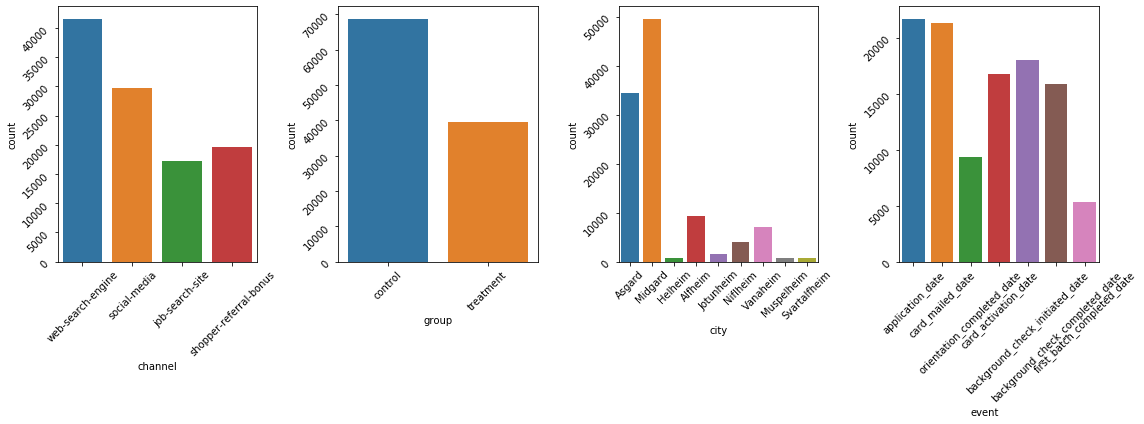

In [39]:
# Plot abundance of categorical features

data_categorical = data_raw.drop(columns=['applicant_id','event_date'])

f, axes = plt.subplots(1, 4, figsize=(16,6))
for i, ax in enumerate(axes.flatten()):

    # get feature data
    data = data_categorical.iloc[:, i]
    
    # create plot
    sns.countplot(data, ax=ax)
    ax.tick_params(labelrotation=45)
    plt.xlabel(data_categorical.columns[i], ha='right') # x-label alignment not working for some reason

plt.tight_layout()

## Data Wrangling

**Overview**

4.1. Merging relevant information
 - Created tables for application, background check initiation, and conversion dates for each shopper
 - Merged these tables on shopper ID
 - Obtained onboarding funnel for prospective shoppers
 - NaNs represent shopper dropped out at that stage
 
4.2 Feature engineering
 - Created new columns for time interval between critical steps
 - NaNs here also represent shopper dropped out during that next step
 
4.3 Separation into A/B groups
 - Control (A) and treatment (B) groups split into 2 tables
 - Difference in time interval between signup and background check initiation plotted 
  - Control group takes at least 2 days for background check initiation (can take more than 1 week)
  - Test group initiates background check on day zero (immediately upon signup)

### Compile application, background, and conversion dates for each prospective shopper

In [81]:
# For each shopper, get application date and background check initiated date
application_dates = data_raw[data_raw['event'] == 'application_date']
background_dates = data_raw[data_raw['event'] == 'background_check_initiated_date']
conversion_dates = data_raw[data_raw['event'] == 'first_batch_completed_date']

In [85]:
# merge application, background, and conversion dates into one table
shopper_funnel_raw = application_dates.merge(background_dates, on='applicant_id', how='left').merge(conversion_dates, on='applicant_id', how='left')
shopper_funnel = shopper_funnel_raw.drop(columns=['channel_y','group_y','city_y','channel','group','city'])
shopper_funnel = shopper_funnel.rename(columns={'applicant_id': 'ID', 
                              'channel_x': 'Channel',
                              'group_x': 'Group',
                              'city_x': 'City',
                              'event_date_x': 'App_date',
                              'event_date_y': 'Back_date',
                              'event_date': 'Conv_date'}).drop(columns=['event_x','event_y','event'])

In [87]:
# print first ten entries in new (merged) table to check it is desired result
shopper_funnel[:10]

,ID,Channel,Group,City,App_date,Back_date,Conv_date
0,10001,web-search-engine,control,Asgard,10/1/18,NaN,NaN
1,10002,social-media,control,Midgard,10/1/18,10/12/18,10/20/18
2,10003,web-search-engine,treatment,Midgard,10/1/18,10/1/18,NaN
3,10004,social-media,treatment,Asgard,10/1/18,10/1/18,10/6/18
4,10005,social-media,treatment,Midgard,10/1/18,10/1/18,10/8/18
5,10006,job-search-site,control,Asgard,10/1/18,NaN,NaN
6,10007,social-media,control,Midgard,10/1/18,10/7/18,10/14/18
7,10008,web-search-engine,control,Asgard,10/1/18,NaN,NaN
8,10009,social-media,control,Helheim,10/1/18,10/4/18,10/9/18
9,10010,job-search-site,control,Asgard,10/1/18,10/5/18,10/10/18


### Engineer features: time interval between critical steps in shopper onboarding

In [88]:
# convert date columns to datetime format
shopper_funnel['App_date'] = pd.to_datetime(shopper_funnel['App_date'], infer_datetime_format=True)
shopper_funnel['Back_date'] = pd.to_datetime(shopper_funnel['Back_date'], infer_datetime_format=True)
shopper_funnel['Conv_date'] = pd.to_datetime(shopper_funnel['Conv_date'], infer_datetime_format=True)

In [103]:
# add columns to table displaying time interval (in days) between critical shopper onboarding steps
shopper_funnel['Time_app_to_back'] = (shopper_funnel['Back_date'] - shopper_funnel['App_date']) / np.timedelta64(1, 'D')
shopper_funnel['Time_back_to_conv'] = (shopper_funnel['Conv_date'] - shopper_funnel['Back_date']) / np.timedelta64(1, 'D')
shopper_funnel['Time_to_conv'] = (shopper_funnel['Conv_date'] - shopper_funnel['App_date']) / np.timedelta64(1, 'D')
shopper_funnel[:10]

,ID,Channel,Group,City,App_date,Back_date,Conv_date,Time_app_to_back,Time_back_to_conv,Time_to_conv
0,10001,web-search-engine,control,Asgard,2018-10-01,NaT,NaT,NaN,NaN,NaN
1,10002,social-media,control,Midgard,2018-10-01,2018-10-12,2018-10-20,11.0,8.0,19.0
2,10003,web-search-engine,treatment,Midgard,2018-10-01,2018-10-01,NaT,0.0,NaN,NaN
3,10004,social-media,treatment,Asgard,2018-10-01,2018-10-01,2018-10-06,0.0,5.0,5.0
4,10005,social-media,treatment,Midgard,2018-10-01,2018-10-01,2018-10-08,0.0,7.0,7.0
5,10006,job-search-site,control,Asgard,2018-10-01,NaT,NaT,NaN,NaN,NaN
6,10007,social-media,control,Midgard,2018-10-01,2018-10-07,2018-10-14,6.0,7.0,13.0
7,10008,web-search-engine,control,Asgard,2018-10-01,NaT,NaT,NaN,NaN,NaN
8,10009,social-media,control,Helheim,2018-10-01,2018-10-04,2018-10-09,3.0,5.0,8.0
9,10010,job-search-site,control,Asgard,2018-10-01,2018-10-05,2018-10-10,4.0,5.0,9.0


### Plot relevant time intervals for control, test groups

In [ ]:
# separate into control and test groups
shopper_funnel_control = shopper_funnel[shopper_funnel['Group'] == 'control']
shopper_funnel_treatment = shopper_funnel[shopper_funnel['Group'] == 'treatment']
shopper_funnel_control

In [ ]:
# drop entries with NaNs in Time_app_to_back column
shopper_funnel_control_no_nans = shopper_funnel_control.dropna(subset=['Time_app_to_back'])
shopper_funnel_treatment_no_nans = shopper_funnel_treatment.dropna(subset=['Time_app_to_back'])
shopper_funnel_treatment_no_nans

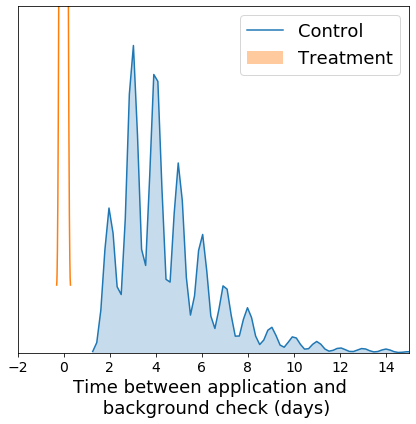

In [196]:
# plot conversion differences versus total pages visited
fig, ax1 = plt.subplots(1, 1, figsize = (6,6))

# time interval: application and background check
sns.kdeplot(shopper_funnel_control_no_nans['Time_app_to_back'], label='Control', ax=ax1, shade=True)
sns.distplot(shopper_funnel_treatment_no_nans['Time_app_to_back'], label='Treatment', ax=ax1, kde_kws={'bw':.1})
ax1.legend(fontsize=18)
ax1.set_ylim([0, 0.45])
ax1.set_xlim([-2, 15])
ax1.get_yaxis().set_visible(False)
ax1.set_xlabel('Time between application and \n background check (days)', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

## A/B testing

**Overview**

- Outline
  - Change to be tested: moving background check initiation to be immediate upon signup, rather than self-paced by shopper 
  - Success metric: Conversion rate (first batch completed) 
  - Null hypothesis: requiring immediate initiation of background check step will not meaningfully increase fraction of shopper signups that ultimately go on to complete a first batch
    
- Execution
  - Minimum desired effect: unknown, will use 2% lift as assumed practical significance level
  - Statistical significance: unknown, will use 95% confidence interval
    
- Results
  - Success rate: fraction of prospective shoppers who complete their first batch of grocery deliveries
  - **Control success rate is 19.8%** -- about 1 in 5, given *no requirement to initiate background check* upon beginning shopper application
  - **Treatment success rate is 34.3%** -- about 1 in 3, given *requirement to immediately initiate background check* step upon applying
  - Observed effect is **14.5% increase in success rate with this change**, with **95% confidence interval spanning 12.1% to 16.9% lift**
- Conclusion
  - Reject null hypothesis - required immediate initiation of background check *does* meaningfully increase shopper conversion 
  - Recommendation: **launch** this feature

### Individual success rates

In [185]:
# Get conversion rate (first batch completed) data for control and treatment groups
n_control = len(shopper_funnel_control)
n_treatment = len(shopper_funnel_treatment)

control_successes = n_control - shopper_funnel_control['Time_to_conv'].isnull().sum()
treatment_successes = n_treatment - shopper_funnel_treatment['Time_to_conv'].isnull().sum()

control_success_rate = control_successes/n_control
treatment_success_rate = treatment_successes/n_treatment

In [218]:
# Get control and treatment group n-sizes, success rates
print('Control sample size = ' + str(n_control))
print('Treatment sample size = ' + str(n_treatment))
print('Control success rate = ' + str(round(control_success_rate,3)))
print('Treatment success rate = ' + str(round(treatment_success_rate,3)))

Control sample size = 14501
Treatment sample size = 7197
Control success rate = 0.198
Treatment success rate = 0.343


### Pooled success rate, standard error

In [217]:
# Calculate pooled success rate, pooled standard error

# P_pool = (Xcont + Xtest) / (Ncont + Ntest)
P_pool = (control_successes + treatment_successes) / (len(shopper_funnel_control) + len(shopper_funnel_treatment))

# SE_pool = (P_pool * (1 - P_pool)*(1/Ncont + 1/Ntest))^(1/2)
SE_pool = ( P_pool * (1 - P_pool) * (1/n_control) + (1/n_treatment) )  ** 0.5
print('Pooled success rate = ' + str(round(P_pool,3)))
print('Pooled standard error = ' + str(round(SE_pool,5)))

Pooled success rate = 0.246
Pooled standard error = 0.01232


### Observed effect and 95% confidence interval

In [219]:
# Calculate empirical difference in success rate
diff_treatment_control = treatment_success_rate - control_success_rate
print('Measured difference between treatment and control = ' + str(round(diff_treatment_control,3)))

Measured difference between treatment and control = 0.145


In [220]:
# calculate 95% confidence interval (z-score = 1.96)
z = 1.96

# lower bound of difference = -z* * SE_pool 
diff_lower_bound = diff_treatment_control - z*SE_pool

# upper bound of difference = z* * SE_pool
diff_upper_bound = diff_treatment_control + z*SE_pool

print('Lower bound = ' + str(round(diff_lower_bound,3)))
print('Upper bound = ' + str(round(diff_upper_bound,3)))

Lower bound = 0.121
Upper bound = 0.169


## Cost analysis

**Outline**

- Questions
 - Is this change cost effective? 
 - How to think about ROI?
 - What if background checks were more expensive?

6.1 Gain vs. loss - basic logic <br>
6.2 Calculations

### Gain from increased shopper conversion

- Basic logic
    - Must compare: 
        - **Gain**: value of increased shopper conversion rate
          - More shoppers leads to increased delivery capacity
          - *Fewer delivery windows must be turned off* during demand spikes
          - Increased revenue during demand spikes
          - May be expressed in terms of average lifetime value (LTV) of shopper to Instacart
          - Probably diminishing returns (LTV -> 0) as each additional shopper lessens the (diminishing) supply-demand gap
        - **Loss**: waste from potential increase in non-converting background checks
          - Background checks done on prospective shoppers who do not complete first batch delivery
          - A loss would correspond to increase in number of non-converting background checks from new policy

###  Background check waste: control vs. treatment

In [227]:
# Calculate number of prospective shoppers who complete background check initiation step
Back_number_control = len(shopper_funnel_control[shopper_funnel_control['Back_date'].notna()])
Back_number_treatment = len(shopper_funnel_treatment[shopper_funnel_treatment['Back_date'].notna()])

# Calculate number of prospective shoppers who complete first batch delivery
Conv_number_control = len(shopper_funnel_control[shopper_funnel_control['Conv_date'].notna()])
Conv_number_treatment = len(shopper_funnel_treatment[shopper_funnel_treatment['Conv_date'].notna()])

# Print these two numbers, fraction of background checks that yield converted shoppers
print('Number of background checks in control group: ' + str(Back_number_control))
print('Number of conversions in control group: ' + str(Conv_number_control))
print('Conversion fraction in control group: ' + str(round(Conv_number_control/Back_number_control,3)))
print('Background check waste in control group: ' + str(1 - round(Conv_number_control/Back_number_control,3)))
print('\n')
print('Number of background checks in treatment group: ' + str(Back_number_treatment))
print('Number of conversions in treatment group: ' + str(Conv_number_treatment))
print('Conversion fraction in treatment group: ' + str(round(Conv_number_treatment/Back_number_treatment,3)))
print('Background check waste in treatment group: ' + str(1 - round(Conv_number_treatment/Back_number_treatment,3)))

Number of background checks in control group: 10836
Number of conversions in control group: 2873
Conversion fraction in control group: 0.265
Background check waste in control group: 0.735


Number of background checks in treatment group: 7197
Number of conversions in treatment group: 2471
Conversion fraction in treatment group: 0.343
Background check waste in treatment group: 0.657


###  Cost of background check waste

With increasing cost of background check, cost savings from higher conversion in treatment group becomes increasingly important.

- $30 / background check (current price)
 - [control: 100% of current waste]
 - treatment: (0.265 conversion in control / 0.343 conversion in treatment group) = 77% of current waste 
 
<br>

- $ 50 / background check
 - control: \\$50 / \\$30 = 167% of current waste
 - treatment: \\$50 / \\$30 * 77% = 129% of current waste
 
<br>
 
- $ 100 / background check
 - control: \\$100 / \\$30 = 333% of current waste
 - treatment: \\$100 / \\$30 * 77% = 257% of current waste 